# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [948]:
# Dependencies and Setup

import pandas as pd # 
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_merged = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
data_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [949]:
# Checking the number of mice.
len(data_merged ['Mouse ID'].unique())

249

In [950]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = data_merged.loc[data_merged.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [951]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_data = data_merged.loc[data_merged['Mouse ID'] == 'g989']
dup_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [952]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_merged[data_merged["Mouse ID"].isin(dup_mice)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [953]:
# Checking the number of mice in the clean DataFrame.
len(clean_data ['Mouse ID'].unique())

248

## Summary Statistics

In [954]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_mean = clean_data.groupby(['Drug Regimen']) ["Tumor Volume (mm3)"].mean()
regimen_median = clean_data.groupby(['Drug Regimen']) ["Tumor Volume (mm3)"].median()
regimen_vari = clean_data.groupby(['Drug Regimen']) ["Tumor Volume (mm3)"].var()
regimen_std = clean_data.groupby(['Drug Regimen']) ["Tumor Volume (mm3)"].std()
regimen_sem = clean_data.groupby(['Drug Regimen']) ["Tumor Volume (mm3)"].sem()

summary_regimen_stats = pd.DataFrame ({ "Tumor Volume Mean": regimen_mean, "Tumor Volume Median" : regimen_median, "Tumor Volume Variance" : regimen_vari, "Tumor Volume Std. Devi" : regimen_std, "Tumor Volume SEM" : regimen_sem})
summary_regimen_stats


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Devi,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [955]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats = clean_data.groupby(['Drug Regimen']) ["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

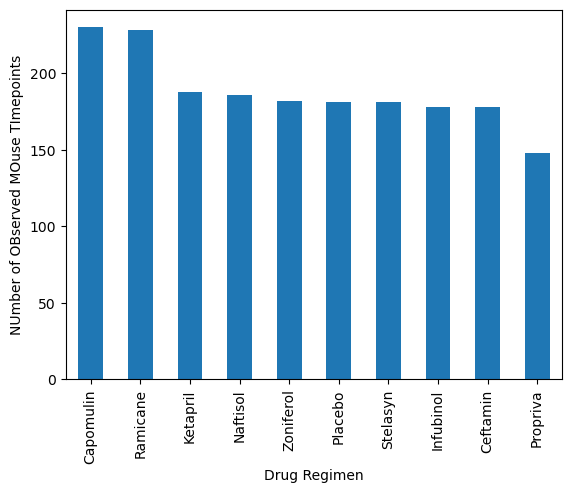

In [956]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_pd_bar = clean_data ['Drug Regimen'].value_counts().plot.bar(width=0.50, ylabel ='NUmber of OBserved MOuse TImepoints')

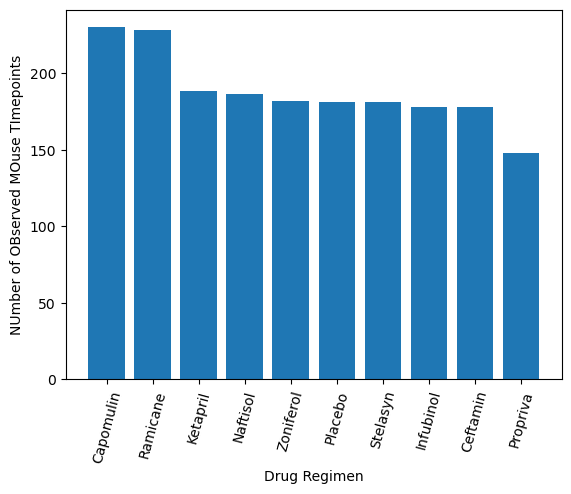

In [957]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_pyplot = clean_data['Drug Regimen'].value_counts()

x_axis = regimen_pyplot.index
y_axis = regimen_pyplot

plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=75)
plt.ylabel('NUmber of OBserved MOuse TImepoints')
plt.show()

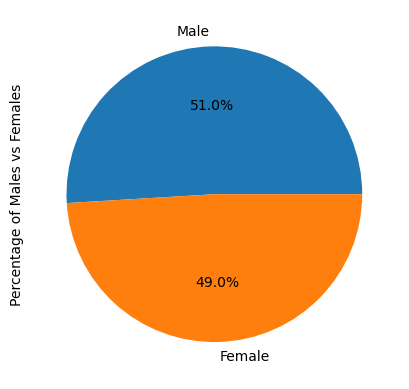

In [958]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_tally = clean_data['Sex'].value_counts()
pie_plot_pd = sex_tally.plot(kind='pie', label= 'Percentage of Males vs Females', autopct="%1.1f%%")

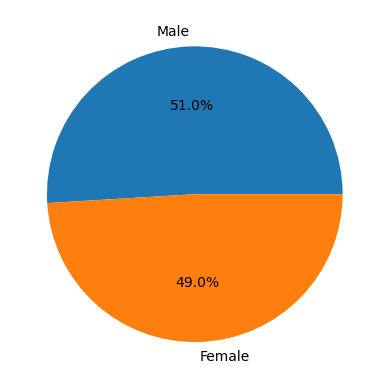

In [959]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_by_label = clean_data['Sex'].unique()
plt.pie(sex_tally, labels= sex_by_label, autopct="%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [960]:
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [961]:
clean_data.groupby(["Mouse ID"])["Timepoint"].max()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [962]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_max_timepoint = pd.merge(clean_data, max_timepoint, on= ("Mouse ID","Timepoint"), how="outer")
merge_max_timepoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [963]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor = merge_max_timepoint.loc[merge_max_timepoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_data.append(tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor.loc[(tumor < lower_bound) | (tumor > upper_bound)]
    print(f"{drug} potential outliers: {outliers}" )

Capomulin potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


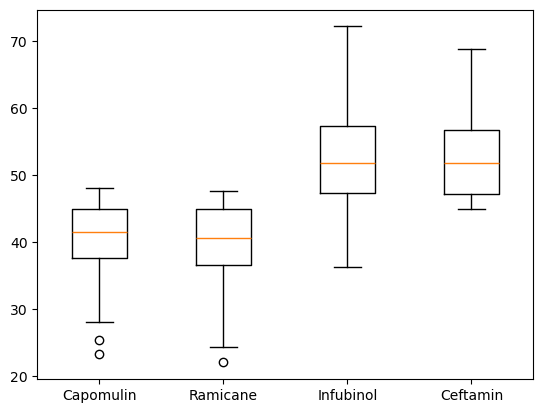

In [964]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_data, labels = treatments)
plt.show()

## Line and Scatter Plots

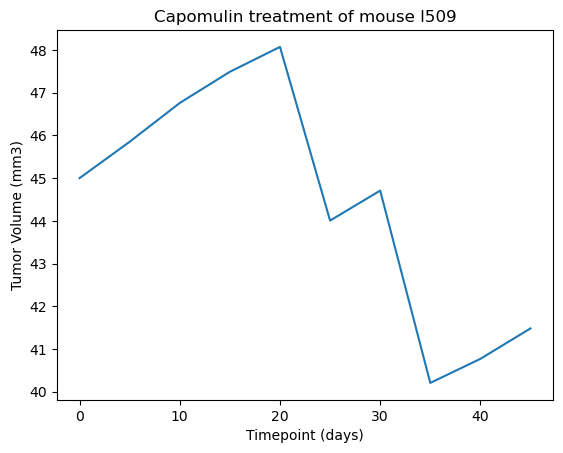

In [965]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_vol = clean_data.loc[clean_data["Mouse ID"] == "l509", "Tumor Volume (mm3)"]
timepoint = clean_data.loc[clean_data["Mouse ID"] == "l509", "Timepoint"]
plt.plot(timepoint, tumor_vol)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

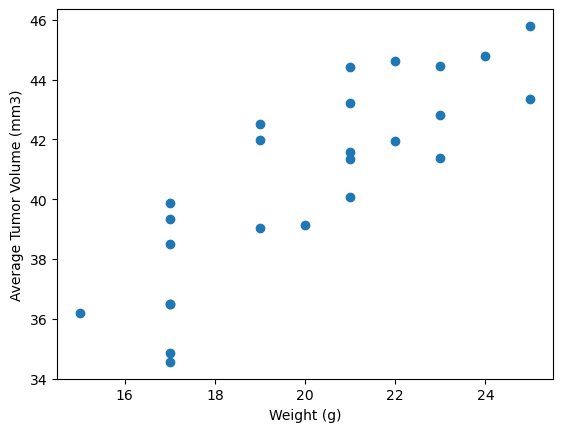

In [966]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
tumor_vol_2 = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", ("Mouse ID","Tumor Volume (mm3)")]
avg_tumor_vol = tumor_vol_2.set_index(["Mouse ID"]).groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouse_weight = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", ("Mouse ID", "Weight (g)")]
mouse_weight = mouse_weight.set_index(["Mouse ID"]).groupby(["Mouse ID"])["Weight (g)"].mean()
plt.scatter(mouse_weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


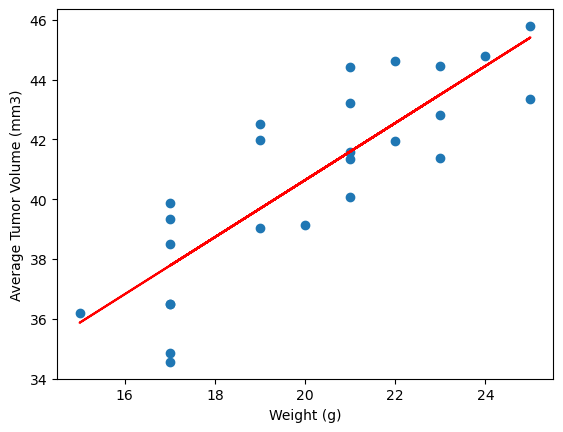

In [967]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
tumor_vol_2 = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", ("Mouse ID","Tumor Volume (mm3)")]
avg_tumor_vol = tumor_vol_2.set_index(["Mouse ID"]).groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
weight = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", ("Mouse ID", "Weight (g)")]
avg_weight = weight.set_index(["Mouse ID"]).groupby(["Mouse ID"])["Weight (g)"].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight, avg_tumor_vol)
regress_values = avg_weight * slope + intercept

plt.scatter(avg_weight, avg_tumor_vol)
plt.plot(avg_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is: {round(rvalue,2)}")
plt.show()